非线性方程求根

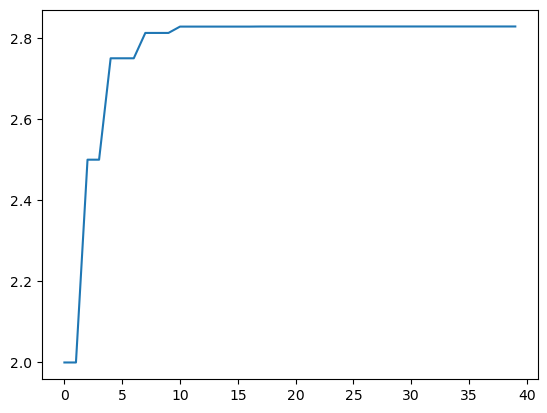

In [ ]:
#搜索法
import matplotlib.pyplot as plt

def f(x):
    return x**2 - 8

eps = 1e-7
dx = 1
x = 1

f_old = f(x)
count = 0
root = []

while abs(f_old) > eps:
    count += 1
    x += dx
    f_new = f(x)
    if f_new*f_old < 0:
        x -= dx
        dx = dx/2
    f_old = f(x)
    root.append(x)

plt.plot(root)

2.8284271247684956 29


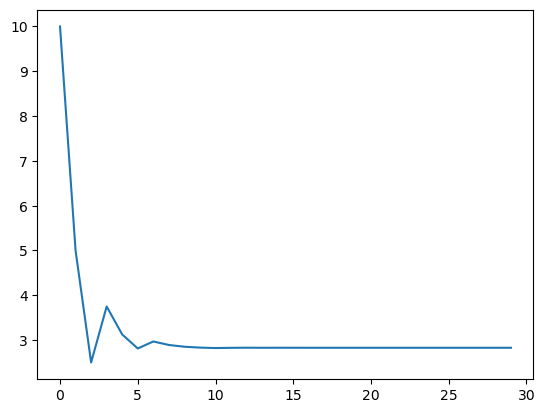

In [6]:
#二分法
import matplotlib.pyplot as plt
def f(x):
    return x**2 - 8
eps = 1e-8
xa = 0
xb = 20
count = 0
root = []
N = 100
for i in range(N):
    x = (xa+xb) / 2
    root.append(x)
    if (f(xa)*f(x) > 0):
        xa = x
    else:
        xb = x
    if abs(f(x)) < eps:
        print(x, i)
        break
    if i == N-1:
        print('No result') 
        break

plt.plot(root)

5


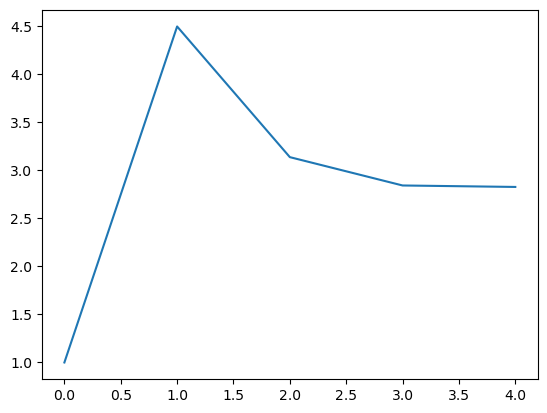

In [8]:
#牛顿-拉普逊方法
import matplotlib.pyplot as plt
def f(x):
    return x**2 - 8
def f_prime(x):
    return 2*x

eps = 1e-8
x = 1
count = 0
root = []

while abs(f(x)) > eps:
    count += 1
    root.append(x)
    x -= f(x) / f_prime(x)

print(count)
plt.plot(root)

7


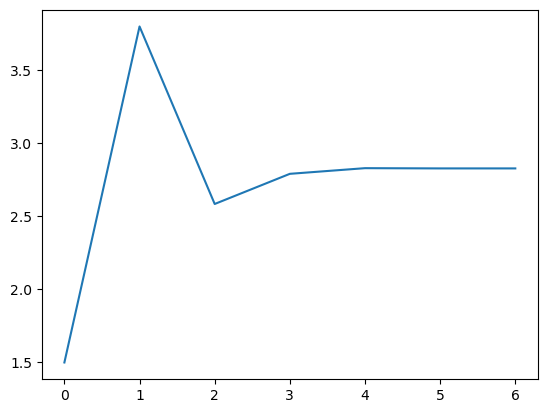

In [ ]:
#弦割法

def f(x):
    return x**2 - 8

eps = 1e-8
x1 = 1
x2 = 1.5
count = 0
root = []

while abs(f(x2)) > eps:
    count += 1
    root.append(x2)
    x2 -= f(x2) / ((f(x1) - f(x2)) / (x1 - x2))
    x1 = root[-1]

print(count)
plt.plot(root)


无限深势阱本征值问题求解：打靶法

14.130358886718717


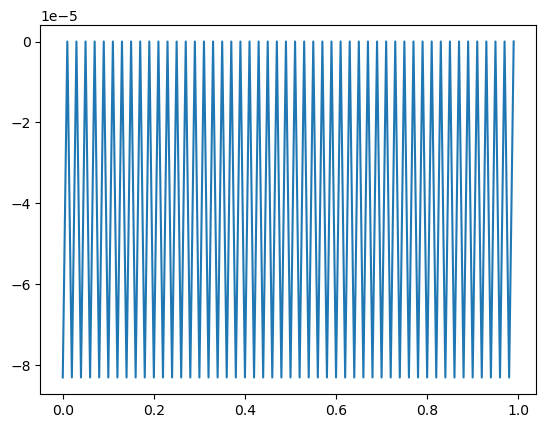

In [29]:
from numpy import zeros
import matplotlib.pyplot as plt

L = 1
N = 100
dt = L/N
k = 2
dk = 0.1
eps = 1e-5

f_return = zeros(2)
psi_phi = zeros(2)
psi_phi_temp = zeros(2)
x = zeros(N)
psi = zeros(N)

def f1(psi_phi, k):
    f_return[0] = -k**2*psi_phi[1]
    f_return[1] = psi_phi[0]
    return f_return

def rk4(dt, k, N):
    psi_phi[0] = 0.01
    psi_phi[1] = 0
    t = 0
    for i in range(N):
        k1, l1 = f1(psi_phi, k)
        psi_phi_temp[0] = psi_phi[0] + k1*dt/2
        psi_phi_temp[1] = psi_phi[1] + l1*dt/2

        k2, l2 = f1(psi_phi_temp, k)
        psi_phi_temp[0] = psi_phi[0] + k2*dt/2
        psi_phi_temp[1] = psi_phi[1] + l2*dt/2

        k3, l3 = f1(psi_phi_temp, k)
        psi_phi_temp[0] = psi_phi[0] + k3*dt/2
        psi_phi_temp[1] = psi_phi[1] + l3*dt/2

        k4, l4 = f1(psi_phi_temp, k)
        psi_phi[0] = psi_phi[0] + (k1 + 2*k2 + 2*k3 + k4)*dt/6
        psi_phi[1] = psi_phi[1] + (k1 + 2*k2 + 2*k3 + k4)*dt/6

        x[i] = t
        psi[i] = psi_phi[1]
        t += dt
    return psi_phi

psi_phi = rk4(dt, k, N)
phi_old = psi_phi[1]

while abs(dk) > eps:
    k += dk
    psi_phi = rk4(dt, k, N)
    phi_new = psi_phi[1]
    if phi_new * phi_old > 0:
        continue
    k -= dk
    dk /= 2

print(k)
plt.plot(x, psi)
plt.show()

最优化问题：最速下降法

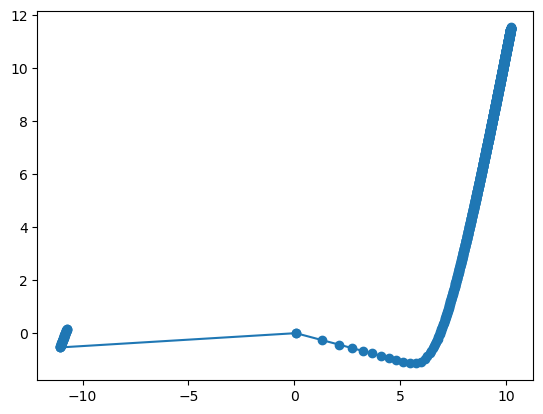

In [44]:
import numpy as np 
import pylab as plt

F = np.zeros([100, 100])
for i in range(100):
    for j in range(100):
        x0 = i*0.2 - 10
        y0 = j*0.2 - 10
        F[i][j] = x0 ** 2+10 * y0 ** 2+4 * x0 * y0

x = 10.234
y = 11.537
delta_r = 1
f_old = x ** 2 + 10 * y ** 2 + 4 * x * y

xx = []
yy = []
xx.append(x)
yy.append(y)

for i in range(1000):
    dfdx = -2 * x - 4 * y
    dfdy = -20 * y - 4 * x
    norm = (dfdx ** 2 + dfdy ** 2) * 0.5
    dx = dfdx/norm
    dy = dfdy/norm
    delta_x = delta_r * dx
    delta_y = delta_r * dy
    x = x + delta_x
    y = y + delta_y
    f_new = x ** 2 + 10 * y ** 2 + 4 * x * y
    if (f_new > f_old):
        x -= delta_x
        y -= delta_y
        delta_r = delta_r / 2
    f_old = f_new
    xx.append(x)
    yy.append(y)
    if delta_r < 1e-6:
        print(x, y)
        break

plt.plot(xx, yy, 'o-')
plt.show()




4.731706717704569e-06 -1.3801022206388747e-06


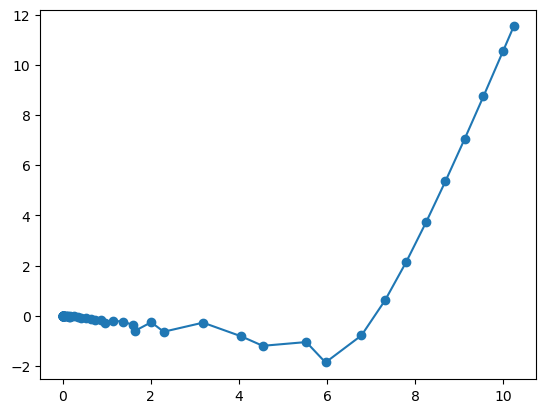

In [49]:
#共轭梯度法
import numpy as np
import matplotlib.pyplot as plt


def f(x, y):
    return x**2 + 10*y**2 + 4*x*y
F = np.zeros([100, 100])
for i in range(100):
    for j in range(100):
        x0 = i*0.2 - 10
        y0 = j*0.2 - 10
        F[i][j] = f(x0, y0)

x = 10.234
y = 11.537
dx_old = 0
dy_old = 0
dfdx_old = 0
dfdy_old = 0
delta_r = 1

f_old = f(x, y)

xx = []
yy = []
xx.append(x)
yy.append(y)

for i in range(1000):
    dfdx = -2 * x - 4 * y
    dfdy = -20 * y - 4 * x
    norm = (dfdx**2 + dfdy**2) ** 0.5
    dx = dfdx / norm
    dy = dfdy / norm

    lamda = ((dfdx**2 + dfdx**2)/ (dfdx_old ** 2 + dfdx_old **2)) if i > 0 else 0
    delta_x = delta_r * (dx + lamda * dx_old)
    delta_y = delta_r * (dy + lamda * dy_old)
    x += delta_x
    y += delta_y

    dx_old, dy_old = dx, dy
    dfdx_old, dfdy_old = dfdx, dfdy

    f_new = f(x, y)
    if f_new > f_old:
        x -= delta_x
        y -= delta_y
        delta_r /= 2
        continue

    xx.append(x)
    yy.append(y)
    f_old = f_new
    
    if delta_r < 1e-6:
        print(x, y)
        break

plt.plot(xx, yy, 'o-')
plt.show()



    

0
1
2
3
4
5
6
7
8
9
